# CLUSTERING ANALYSIS 

## Understanding and Implementing K-Means, Hierarchical, and DBSCAN Algorithms


## Objective:

The objective of this assignment is to introduce to various clustering algorithms, including K-Means, hierarchical, and DBSCAN, and provide hands-on experience in applying these techniques to a real-world dataset.

## Datasets :
#### EastWestAirlines
## Data Preprocessing:

1.	Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.

2.	Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.

3.	Use multiple visualizations to understand the hidden patterns in the dataset

## Implementing Clustering Algorithms:

•	Implement the K-Means, hierarchical, and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn or MATLAB.

•	Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data.

•	Experiment with different parameter settings for hierarchical clustering (e.g., linkage criteria), K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.

## Cluster Analysis and Interpretation:

•	Analyse the clusters generated by each clustering algorithm and interpret the characteristics of each cluster. Write you insights in few comments.

## Visualization:

Visualize the clustering results using scatter plots or other suitable visualization techniques.

Plot the clusters with different colours to visualize the separation of data points belonging to different clusters.

## Evaluation and Performance Metrics:

Evaluate the quality of clustering using internal evaluation metrics such as silhouette score for K-Means and DBSCAN.


import libraries

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

load the data

In [9]:
data=pd.read_excel("F:\\DATA SCIENCE_ExcelR\\Assignments\\Clustering\\EastWestAirlines.xlsx",sheet_name=1)
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [11]:
data.tail()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0
3998,4021,3016,0,1,1,1,0,0,0,0,1398,0


In [12]:
data.shape

(3999, 12)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [18]:
data.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [20]:
data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [22]:
data.nunique()

ID#                  3999
Balance              3904
Qual_miles            164
cc1_miles               5
cc2_miles               3
cc3_miles               5
Bonus_miles          2734
Bonus_trans            57
Flight_miles_12mo     343
Flight_trans_12        35
Days_since_enroll    2820
Award?                  2
dtype: int64

In [24]:
data.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

eda

histograms

In [28]:
categorical_columns=data[['cc1_miles','cc2_miles','cc3_miles','Award?']]

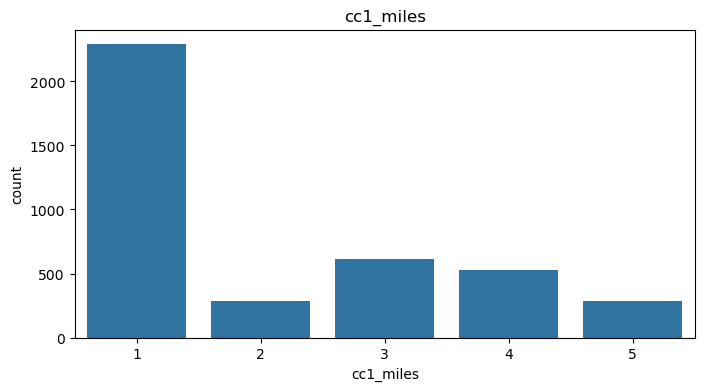

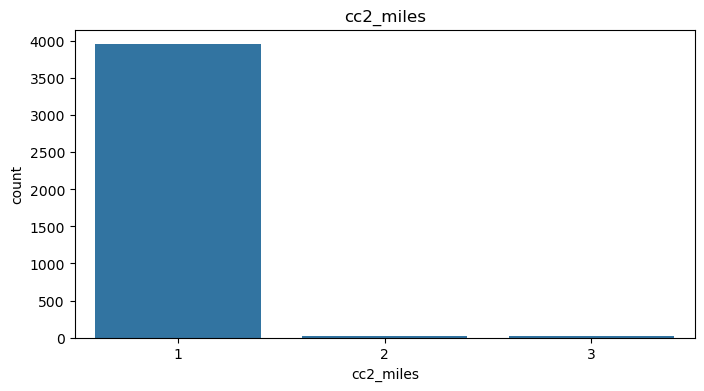

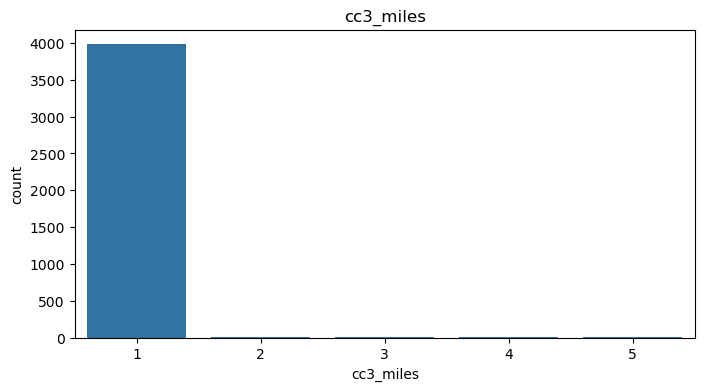

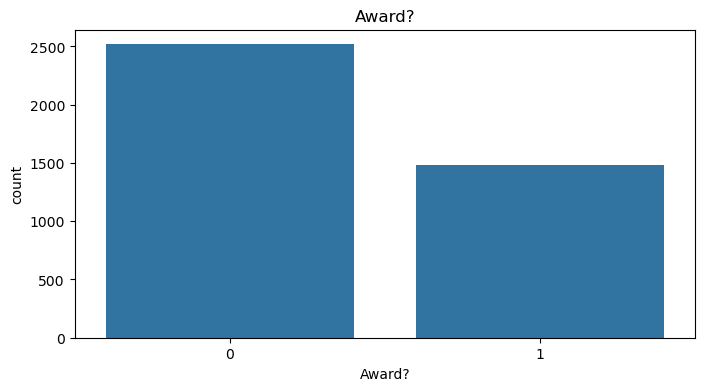

In [30]:
for col in categorical_columns:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col,data=data)
    plt.xlabel(col)
    plt.ylabel('count')
    plt.title(f"{col}")
    plt.show()

In [31]:
numerical_columns=data.drop(columns=['ID#','cc1_miles','cc2_miles','cc3_miles','Award?'])

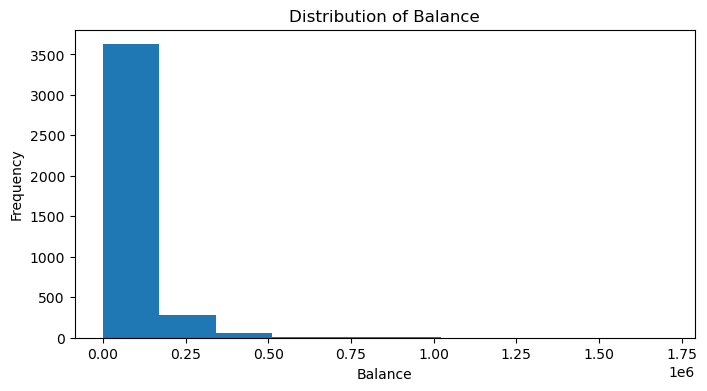

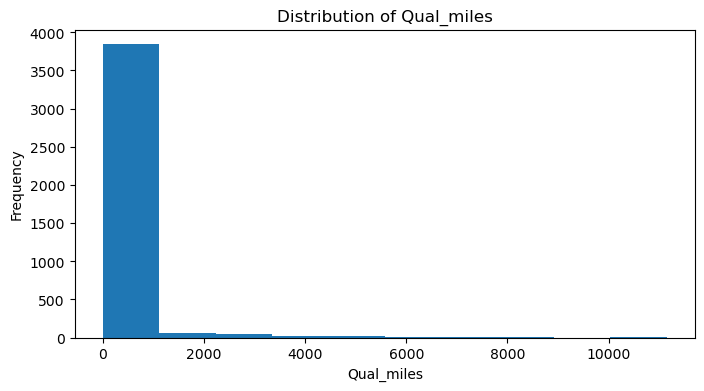

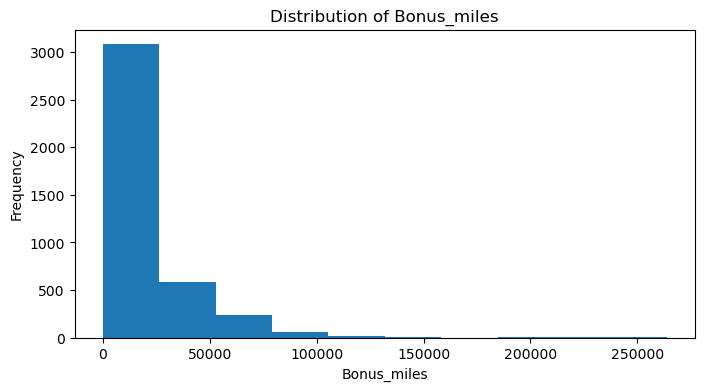

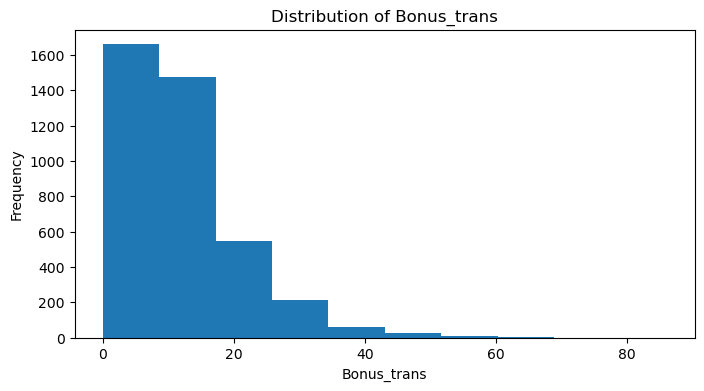

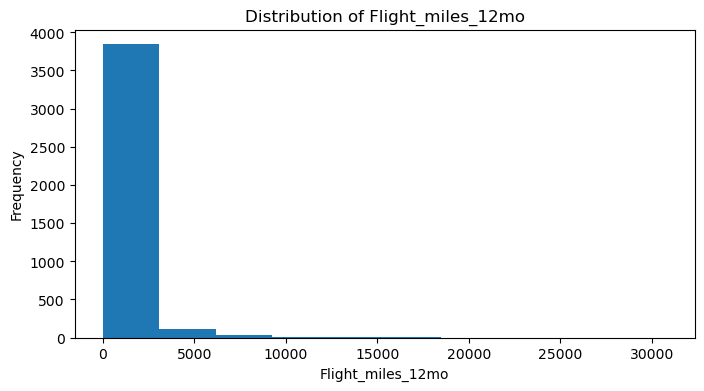

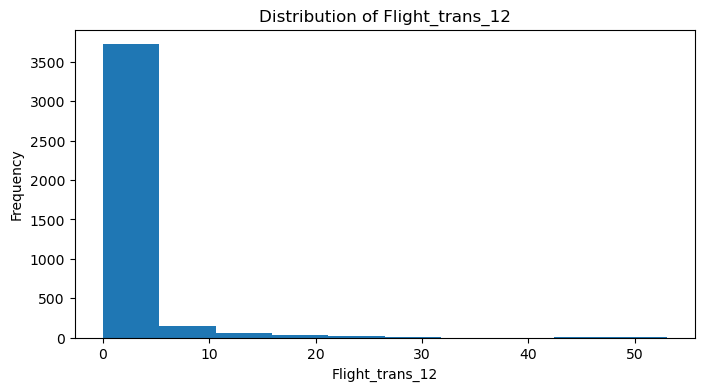

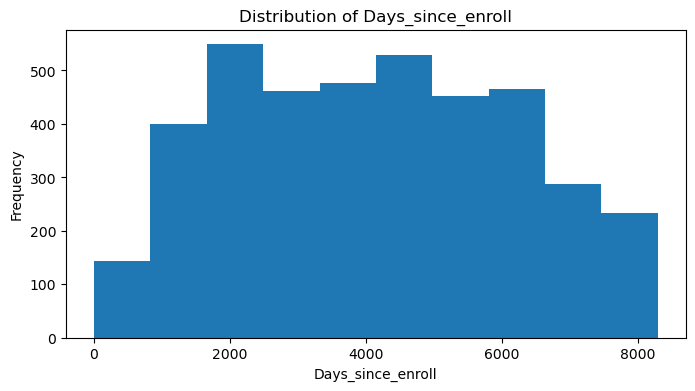

In [34]:
for col in numerical_columns:
    plt.figure(figsize=(8,4))
    plt.hist(data[col])
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {col}")
    plt.show()

In [35]:
for col in numerical_columns:
    print(f"skewness of {col} is {data[col].skew()}")

skewness of Balance is 5.004187034431081
skewness of Qual_miles is 7.512395072097138
skewness of Bonus_miles is 2.8420933668869197
skewness of Bonus_trans is 1.1573624831608498
skewness of Flight_miles_12mo is 7.451666167619329
skewness of Flight_trans_12 is 5.490461246535664
skewness of Days_since_enroll is 0.12017356507902774


columm :  Balance
No of outliers :  266
Outlier percentage :  6.652
---------------------------------------------
columm :  Qual_miles
No of outliers :  226
Outlier percentage :  5.651
---------------------------------------------
columm :  Bonus_miles
No of outliers :  280
Outlier percentage :  7.002
---------------------------------------------
columm :  Bonus_trans
No of outliers :  63
Outlier percentage :  1.575
---------------------------------------------
columm :  Flight_miles_12mo
No of outliers :  569
Outlier percentage :  14.229
---------------------------------------------
columm :  Flight_trans_12
No of outliers :  565
Outlier percentage :  14.129
---------------------------------------------
columm :  Days_since_enroll
No of outliers :  0
Outlier percentage :  0.0
---------------------------------------------


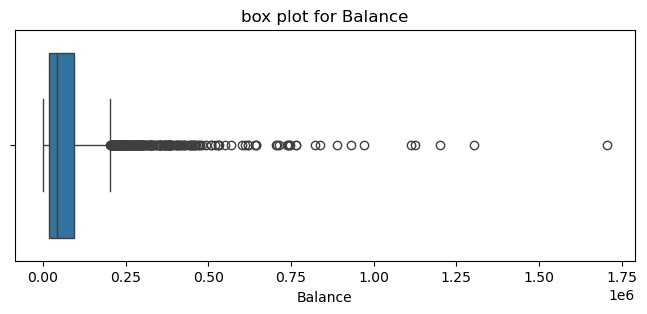

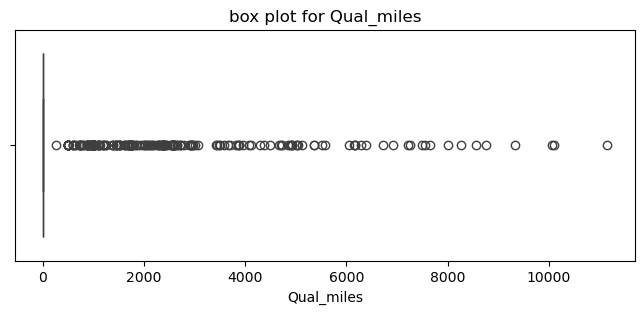

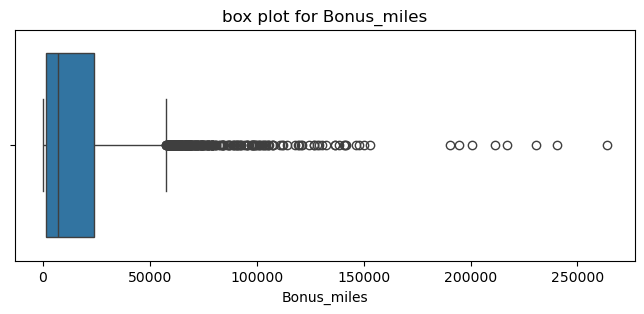

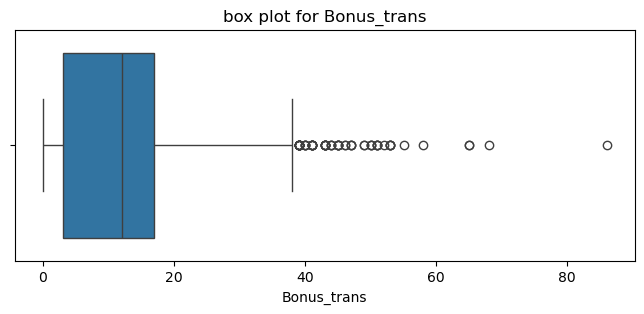

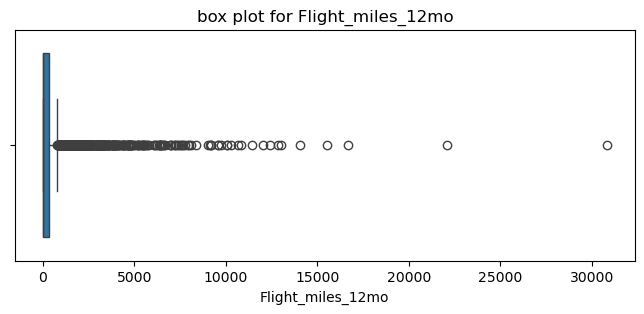

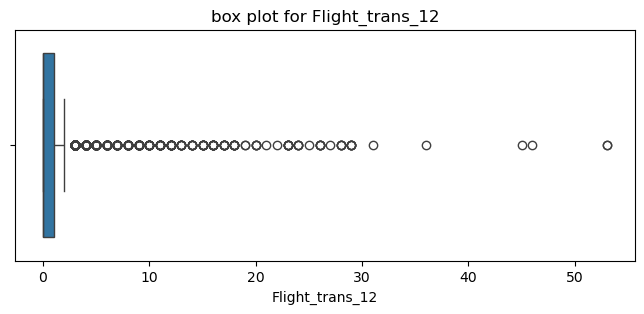

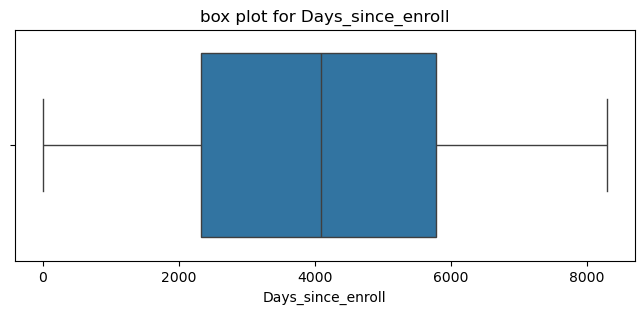

In [36]:
for col in numerical_columns:
    s = data[col].dropna()
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    uwl = q3 + 1.5 * iqr
    lwl = q1 - 1.5 * iqr
    outliers = s[(s < lwl) | (s > uwl)]
    print("columm : ",col)
    print("No of outliers : ",len(outliers))
    percent=(len(outliers)/len(data))*100
    print("Outlier percentage : ",np.round(percent,3))
    print("---------------------------------------------")
for col in numerical_columns:
    plt.figure(figsize=(8,3))
    sns.boxplot(x=data[col])
    plt.title(f"box plot for {col}")
    plt.xlabel(col)
    plt.show()


correlation and heatmap 

In [40]:
corr=numerical_columns.corr()
corr

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
Balance,1.000000,0.108722,0.403487,0.324935,0.217551,0.255700,0.263129
Qual_miles,0.108722,1.000000,0.031021,0.050725,0.126774,0.144004,0.017312
Bonus_miles,0.403487,0.031021,1.000000,0.603180,0.183536,0.185261,0.210397
Bonus_trans,0.324935,0.050725,0.603180,1.000000,0.377216,0.432364,0.161262
Flight_miles_12mo,0.217551,0.126774,0.183536,0.377216,1.000000,0.869193,0.037271
Flight_trans_12,0.255700,0.144004,0.185261,0.432364,0.869193,1.000000,0.059260
Days_since_enroll,0.263129,0.017312,0.210397,0.161262,0.037271,0.059260,1.000000


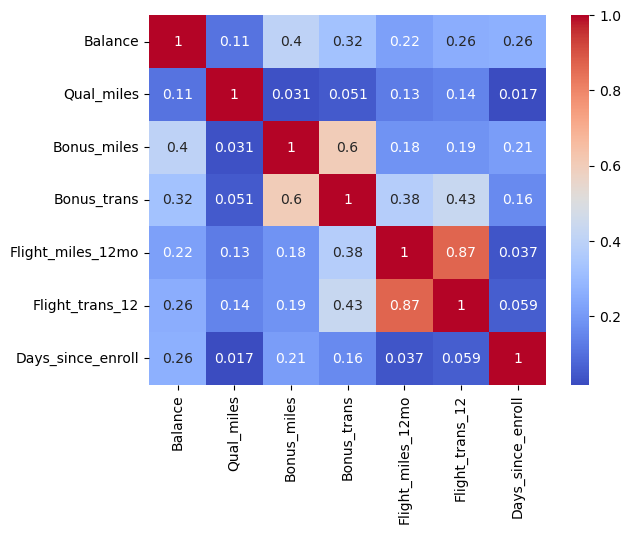

In [43]:
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

scaling the data

In [46]:
df_log=data.copy()

In [48]:
skewed_features=['Balance', 'Qual_miles', 'Bonus_miles', 'Flight_miles_12mo', 'Flight_trans_12']
for col in skewed_features:
    df_log[col] = np.log1p(df_log[col])

In [50]:
X= df_log.drop(columns=['ID#', 'Award?'])

In [52]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler=StandardScaler()
df_scaled=scaler.fit_transform(X)

In [56]:
X_scaled_df=pd.DataFrame(df_scaled, columns=X.columns)

In [58]:
X_scaled_df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,-0.240588,-0.243383,-0.769578,-0.098242,-0.062767,-0.829165,-1.104065,-0.669104,-0.576530,1.395454
1,-0.538514,-0.243383,-0.769578,-0.098242,-0.062767,-0.764962,-0.999926,-0.669104,-0.576530,1.379957
2,0.061081,-0.243383,-0.769578,-0.098242,-0.062767,0.134622,-0.791649,-0.669104,-0.576530,1.411920
3,-0.745589,-0.243383,-0.769578,-0.098242,-0.062767,-0.508343,-1.104065,-0.669104,-0.576530,1.372208
4,0.735382,-0.243383,1.409471,-0.098242,-0.062767,0.851822,1.499394,1.760457,1.575216,1.363975


In [60]:
X_scaled_df.shape

(3999, 10)

Kmeans,Agglomerative,DBscan

In [64]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.decomposition import PCA

kmeans

In [70]:
inertia = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

elbow method to find k 

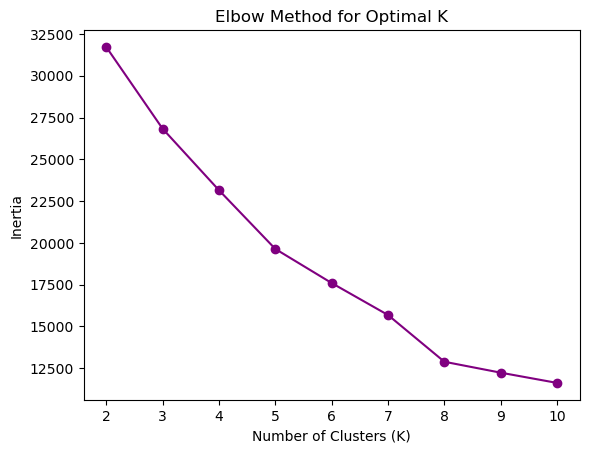

In [72]:
plt.plot(K, inertia, marker='o', color='purple')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

In [74]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled_df)
    sil_score = silhouette_score(X_scaled_df, labels)
    silhouette_scores.append(sil_score)

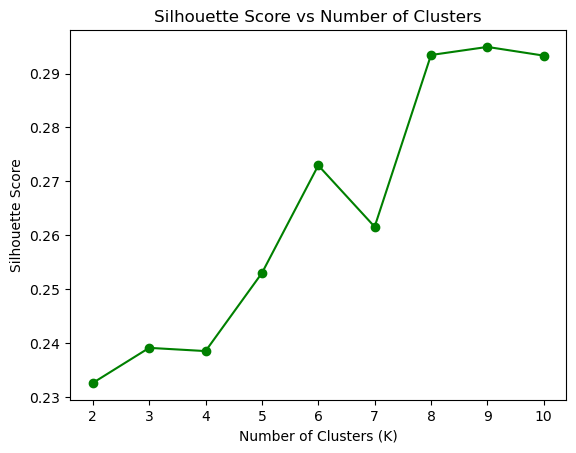

In [76]:
plt.plot(range(2, 11), silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

In [78]:
best_k = np.argmax(silhouette_scores) + 2
print(f"Optimal K based on silhouette: {best_k}")

Optimal K based on silhouette: 9


In [80]:
kmeans = KMeans(n_clusters=best_k, random_state=42)
X_scaled_df['KMeans_cluster'] = kmeans.fit_predict(X_scaled_df)
print("KMeans Clustering Done!")

KMeans Clustering Done!


In [82]:
kmeans_silhouette = silhouette_score(X_scaled_df.drop('KMeans_cluster', axis=1), X_scaled_df['KMeans_cluster'])
print("KMeans Silhouette Score:", np.round(kmeans_silhouette, 3))

KMeans Silhouette Score: 0.295


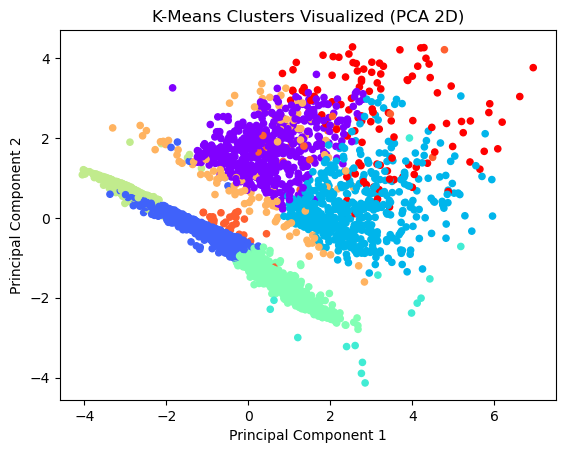

In [84]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled_df.drop('KMeans_cluster', axis=1))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=X_scaled_df['KMeans_cluster'], cmap='rainbow', s=20)
plt.title("K-Means Clusters Visualized (PCA 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

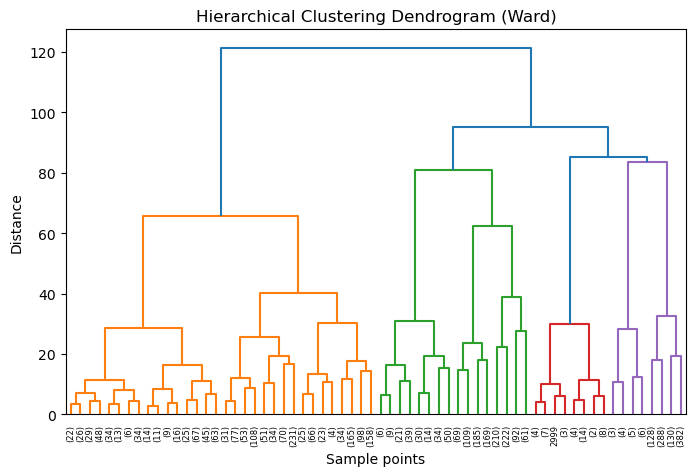

In [86]:
plt.figure(figsize=(8, 5))
Z = linkage(X_scaled_df.drop('KMeans_cluster', axis=1), method='ward')
dendrogram(Z, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram (Ward)")
plt.xlabel("Sample points")
plt.ylabel("Distance")
plt.show()

agglomerative

In [88]:
linkages = ['single', 'complete', 'average', 'ward']

In [96]:
for method in linkages:
    print(f"\nEvaluating linkage method: {method.upper()}\n")
  
    agg = AgglomerativeClustering(n_clusters=best_k, linkage=method)
    X_scaled_df[f'HC_{method}'] = agg.fit_predict(X_scaled_df.drop(columns=['KMeans_cluster'], errors='ignore'))
    
    sil = silhouette_score(
        X_scaled_df.drop(columns=[col for col in X_scaled_df.columns if 'HC_' in col or 'KMeans' in col]),
        X_scaled_df[f'HC_{method}']
    )
    
    print(f"{method.capitalize()} linkage silhouette score:", np.round(sil, 3))
    print("------------------------------------------------")



Evaluating linkage method: SINGLE

Single linkage silhouette score: 0.485
------------------------------------------------

Evaluating linkage method: COMPLETE

Complete linkage silhouette score: 0.106
------------------------------------------------

Evaluating linkage method: AVERAGE

Average linkage silhouette score: 0.106
------------------------------------------------

Evaluating linkage method: WARD

Ward linkage silhouette score: 0.268
------------------------------------------------


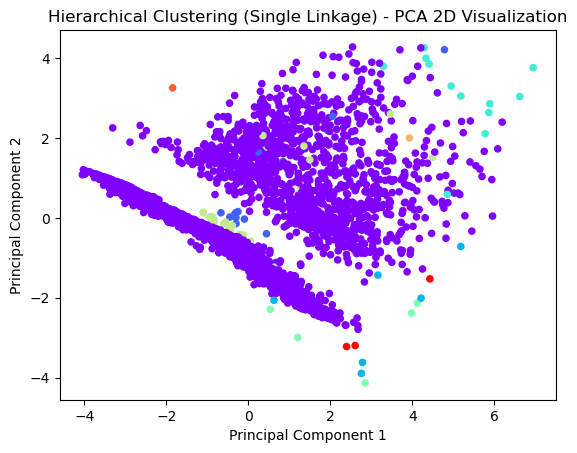

In [98]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled_df.drop(columns=[col for col in X_scaled_df.columns if 'HC_' in col or 'KMeans' in col]))

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=X_scaled_df['HC_single'], cmap='rainbow', s=20)
plt.title("Hierarchical Clustering (Single Linkage) - PCA 2D Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

dbscan

In [100]:
eps_values = [1.5, 2.0, 2.5, 3.0]
min_samples = [3, 4, 5]


In [102]:
for eps in eps_values:
    for m in min_samples:
        db = DBSCAN(eps=eps, min_samples=m)
        labels = db.fit_predict(X_scaled_df.drop(columns=[col for col in X_scaled_df.columns if 'cluster' in col]))
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters > 1:
            sil = silhouette_score(X_scaled_df.drop(columns=[col for col in X_scaled_df.columns if 'cluster' in col])[labels != -1],
                                   labels[labels != -1])
            print(f"DBSCAN (eps={eps}, min_samples={m}) → Clusters={n_clusters}, Silhouette={np.round(sil, 3)}")
        else:
            print(f"DBSCAN (eps={eps}, min_samples={m}) → Only noise or single cluster.")


DBSCAN (eps=1.5, min_samples=3) → Clusters=16, Silhouette=0.436
DBSCAN (eps=1.5, min_samples=4) → Clusters=15, Silhouette=0.435
DBSCAN (eps=1.5, min_samples=5) → Clusters=13, Silhouette=0.446
DBSCAN (eps=2.0, min_samples=3) → Clusters=12, Silhouette=0.485
DBSCAN (eps=2.0, min_samples=4) → Clusters=12, Silhouette=0.485
DBSCAN (eps=2.0, min_samples=5) → Clusters=10, Silhouette=0.486
DBSCAN (eps=2.5, min_samples=3) → Clusters=10, Silhouette=0.471
DBSCAN (eps=2.5, min_samples=4) → Clusters=8, Silhouette=0.471
DBSCAN (eps=2.5, min_samples=5) → Clusters=8, Silhouette=0.471
DBSCAN (eps=3.0, min_samples=3) → Clusters=8, Silhouette=0.459
DBSCAN (eps=3.0, min_samples=4) → Clusters=7, Silhouette=0.46
DBSCAN (eps=3.0, min_samples=5) → Clusters=6, Silhouette=0.459


In [106]:
dbscan = DBSCAN(eps=2.5, min_samples=5)
X_scaled_df['DBSCAN_cluster'] = dbscan.fit_predict(X_scaled_df.drop(columns=[col for col in X_scaled_df.columns if 'cluster' in col]))
print("DBSCAN Clustering Done!")

DBSCAN Clustering Done!


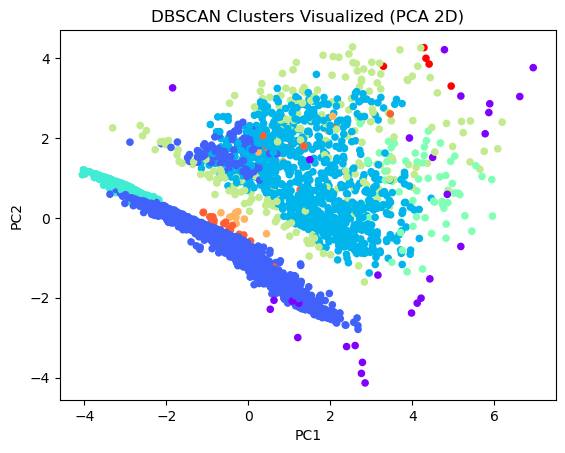

In [108]:
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=X_scaled_df['DBSCAN_cluster'], cmap='rainbow', s=20)
plt.title("DBSCAN Clusters Visualized (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

comparing all 

In [110]:
print("KMeans Silhouette Score:", np.round(kmeans_silhouette, 3))
for method in linkages:
    sil = silhouette_score(X_scaled_df.drop(columns=[col for col in X_scaled_df.columns if 'cluster' in col]),
                           X_scaled_df[f'HC_{method}'])
    print(f"Hierarchical ({method}) Silhouette Score:", np.round(sil, 3))
valid_db = X_scaled_df['DBSCAN_cluster'] != -1
if len(set(X_scaled_df['DBSCAN_cluster'])) > 1:
    dbscan_sil = silhouette_score(X_scaled_df.drop(columns=[col for col in X_scaled_df.columns if 'cluster' in col])[valid_db],
                                  X_scaled_df['DBSCAN_cluster'][valid_db])
    print("DBSCAN Silhouette Score:", np.round(dbscan_sil, 3))
else:
    print("DBSCAN Silhouette Score: Not applicable (single or noisy cluster)")


KMeans Silhouette Score: 0.295
Hierarchical (single) Silhouette Score: 0.496
Hierarchical (complete) Silhouette Score: 0.268
Hierarchical (average) Silhouette Score: 0.28
Hierarchical (ward) Silhouette Score: 0.45
DBSCAN Silhouette Score: 0.471


the best one among all is Hierarchical (single) with 0.496 Silhouette Score